In [ ]:
import pandas as pd

train_data = pd.read_csv('train.tsv', sep='\t', header=None)
test_data = pd.read_csv('test.tsv', sep='\t', header=None)
valid_data = pd.read_csv('valid.tsv', sep='\t', header=None)

print("Train data shape: ", train_data.shape)
print("Test data shape: ", test_data.shape)
print("Valid data shape: ", valid_data.shape)

train_data.head()


Train data shape:  (10240, 14)
Test data shape:  (1267, 14)
Valid data shape:  (1284, 14)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [ ]:
train_data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
10235,5473.json,mostly-true,There are a larger number of shark attacks in ...,"animals,elections",aclu-florida,NaN,Florida,none,0.0,1.0,1.0,1.0,0.0,"interview on ""The Colbert Report"""
10236,3408.json,mostly-true,Democrats have now become the party of the [At...,elections,alan-powell,NaN,Georgia,republican,0.0,0.0,0.0,1.0,0.0,an interview
10237,3959.json,half-true,Says an alternative to Social Security that op...,"retirement,social-security",herman-cain,NaN,Georgia,republican,4.0,11.0,5.0,3.0,3.0,a Republican presidential debate
10238,2253.json,false,On lifting the U.S. Cuban embargo and allowing...,"florida,foreign-policy",jeff-greene,NaN,Florida,democrat,3.0,1.0,3.0,0.0,0.0,a televised debate on Miami's WPLG-10 against ...
10239,1155.json,pants-fire,The Department of Veterans Affairs has a manua...,"health-care,veterans",michael-steele,chairman of the Republican National Committee,Maryland,republican,0.0,1.0,1.0,0.0,2.0,a Fox News interview


In [ ]:
train_data.columns = ['ID', 'Label', 'Statement', 'Subject', 'Speaker', 'Job Title',
                      'State', 'Party', 'BTC', 'FC', 'HTC', 'MTC', 'POFC', 'Context']

test_data.columns = train_data.columns
valid_data.columns = train_data.columns

train_data.head()


,ID,Label,Statement,Subject,Speaker,Job Title,State,Party,BTC,FC,HTC,MTC,POFC,Context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


In [ ]:
train_data = train_data[['Statement', 'Label']]
test_data = test_data[['Statement', 'Label']]
valid_data = valid_data[['Statement', 'Label']]

train_data.head()


,Statement,Label
0,Says the Annies List political group supports ...,false
1,When did the decline of coal start? It started...,half-true
2,"Hillary Clinton agrees with John McCain ""by vo...",mostly-true
3,Health care reform legislation is likely to ma...,false
4,The economic turnaround started at the end of ...,half-true


In [ ]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

train_data['Statement'] = train_data['Statement'].apply(clean_text)
test_data['Statement'] = test_data['Statement'].apply(clean_text)
valid_data['Statement'] = valid_data['Statement'].apply(clean_text)

train_data.head()


,Statement,Label
0,says the annies list political group supports ...,false
1,when did the decline of coal start it started ...,half-true
2,hillary clinton agrees with john mccain by vot...,mostly-true
3,health care reform legislation is likely to ma...,false
4,the economic turnaround started at the end of ...,half-true


In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

train_data['Sentiment'] = train_data['Statement'].apply(get_sentiment) + 1
test_data['Sentiment'] = test_data['Statement'].apply(get_sentiment) + 1
valid_data['Sentiment'] = valid_data['Statement'].apply(get_sentiment) + 1

train_data.head()

,Statement,Label,Sentiment
0,says the annies list political group supports ...,false,1.0
1,when did the decline of coal start it started ...,half-true,1.1
2,hillary clinton agrees with john mccain by vot...,mostly-true,1.0
3,health care reform legislation is likely to ma...,false,1.2
4,the economic turnaround started at the end of ...,half-true,1.2


by default sentiment score is like this:

*   sentiment score = -1 -> Strongly negative
*   sentiment score = 0 -> Neutral
*   sentiment score = 1 -> Strongly Positive



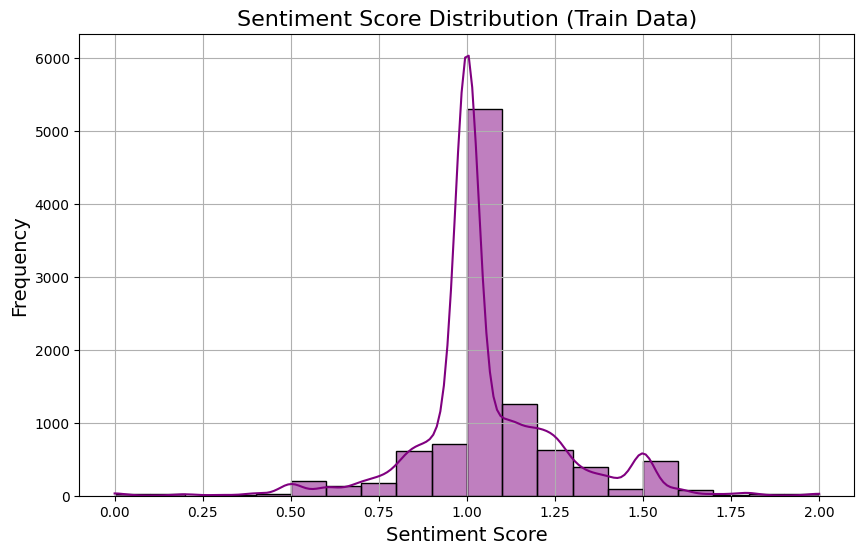

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.histplot(train_data['Sentiment'], bins=20, kde=True, color='purple')
plt.title('Sentiment Score Distribution (Train Data)', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()


In [ ]:
print("Missing Values in Train Data:")
print(train_data.isnull().sum())

print("\nMissing Values in Test Data:")
print(test_data.isnull().sum())

print("\nMissing Values in Valid Data:")
print(valid_data.isnull().sum())


Missing Values in Train Data:
Statement    0
Label        0
Sentiment    0
dtype: int64

Missing Values in Test Data:
Statement    0
Label        0
Sentiment    0
dtype: int64

Missing Values in Valid Data:
Statement    0
Label        0
Sentiment    0
dtype: int64


<ipython-input-29-58a2e886237c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=train_data, palette='Set2')


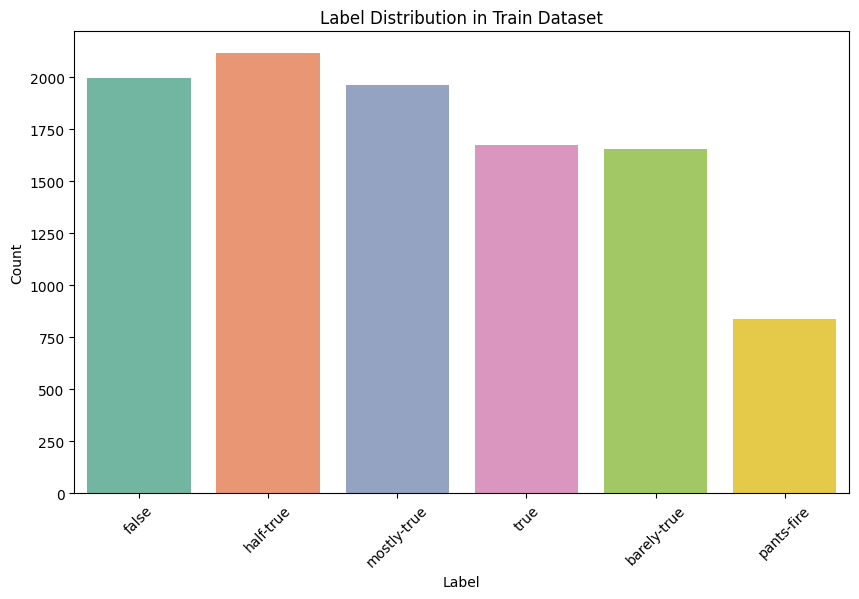

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=train_data, palette='Set2')
plt.title('Label Distribution in Train Dataset')
plt.xticks(rotation=45)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_data['Label'] = le.fit_transform(train_data['Label'])
test_data['Label'] = le.transform(test_data['Label'])
valid_data['Label'] = le.transform(valid_data['Label'])

print(dict(zip(le.classes_, le.transform(le.classes_))))


{'barely-true': np.int64(0), 'false': np.int64(1), 'half-true': np.int64(2), 'mostly-true': np.int64(3), 'pants-fire': np.int64(4), 'true': np.int64(5)}


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

vectorizer = TfidfVectorizer(max_features=5000)

X_train_tfidf = vectorizer.fit_transform(train_data['Statement'])
X_test_tfidf = vectorizer.transform(test_data['Statement'])
X_valid_tfidf = vectorizer.transform(valid_data['Statement'])

X_train = hstack((X_train_tfidf, train_data['Sentiment'].values.reshape(-1,1)))
X_test = hstack((X_test_tfidf, test_data['Sentiment'].values.reshape(-1,1)))
X_valid = hstack((X_valid_tfidf, valid_data['Sentiment'].values.reshape(-1,1)))

y_train = train_data['Label']
y_test = test_data['Label']
y_valid = valid_data['Label']


<ipython-input-32-b5af69fd6a2f>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette='Set2')


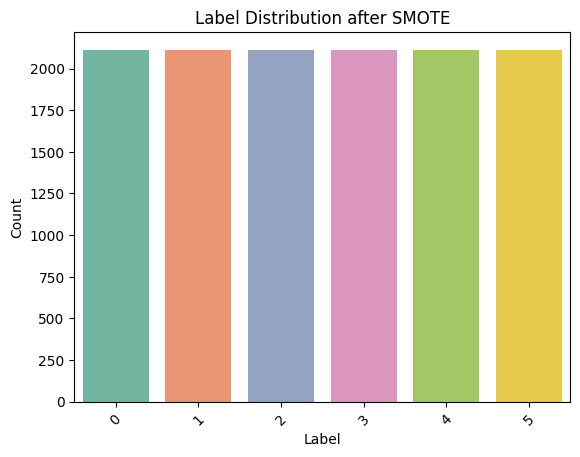

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)

X_train, y_train = smote.fit_resample(X_train, y_train)

sns.countplot(x=y_train, palette='Set2')
plt.title('Label Distribution after SMOTE')
plt.xticks(rotation=45)
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


Naive Bayes Accuracy:  0.23677979479084452
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.23      0.22      0.22       212
           1       0.26      0.19      0.22       249
           2       0.26      0.20      0.23       265
           3       0.24      0.24      0.24       241
           4       0.17      0.34      0.22        92
           5       0.24      0.30      0.27       208

    accuracy                           0.24      1267
   macro avg       0.24      0.25      0.24      1267
weighted avg       0.24      0.24      0.24      1267



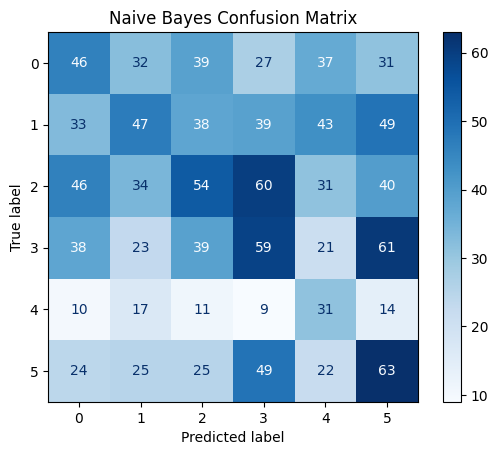

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

print("Naive Bayes Accuracy: ", accuracy_nb)
print("Naive Bayes Classification Report:\n", report_nb)


def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

plot_conf_matrix(y_test, y_pred_nb, "Naive Bayes Confusion Matrix")


Decision Tree Accuracy:  0.22099447513812154
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.19      0.17      0.18       212
           1       0.25      0.27      0.26       249
           2       0.21      0.20      0.21       265
           3       0.23      0.24      0.23       241
           4       0.16      0.18      0.17        92
           5       0.24      0.24      0.24       208

    accuracy                           0.22      1267
   macro avg       0.21      0.22      0.21      1267
weighted avg       0.22      0.22      0.22      1267



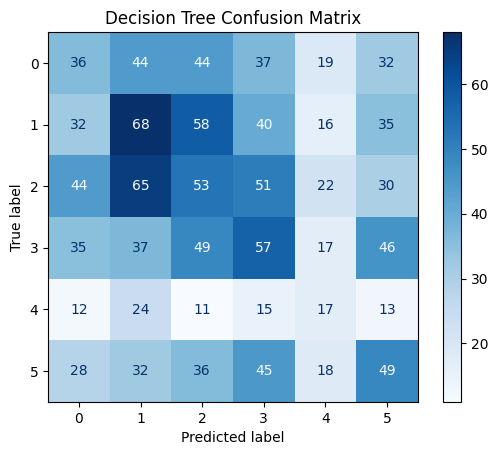

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)

print("Decision Tree Accuracy: ", accuracy_dt)
print("Decision Tree Classification Report:\n", report_dt)

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

plot_conf_matrix(y_test, y_pred_dt, "Decision Tree Confusion Matrix")


KNN Accuracy:  0.15627466456195738
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.16      0.19      0.18       212
           1       0.30      0.10      0.15       249
           2       0.41      0.04      0.08       265
           3       0.21      0.07      0.11       241
           4       0.09      0.61      0.16        92
           5       0.24      0.23      0.23       208

    accuracy                           0.16      1267
   macro avg       0.23      0.21      0.15      1267
weighted avg       0.26      0.16      0.14      1267



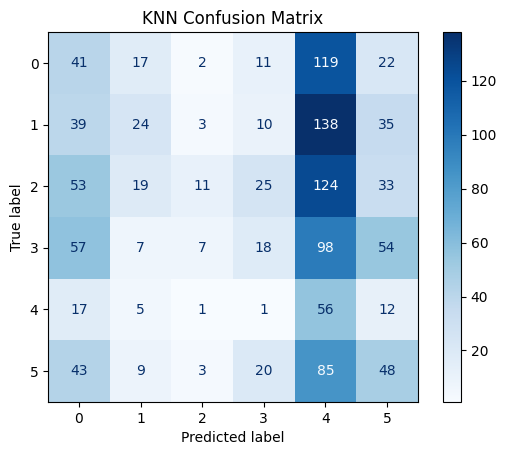

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
report_knn = classification_report(y_test, y_pred_knn)

print("KNN Accuracy: ", accuracy_knn)
print("KNN Classification Report:\n", report_knn)

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

plot_conf_matrix(y_test, y_pred_knn, "KNN Confusion Matrix")


Logistic Regression Accuracy:  0.24151539068666142
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.22      0.21      0.21       212
           1       0.30      0.25      0.27       249
           2       0.27      0.21      0.24       265
           3       0.25      0.22      0.24       241
           4       0.16      0.32      0.21        92
           5       0.24      0.28      0.26       208

    accuracy                           0.24      1267
   macro avg       0.24      0.25      0.24      1267
weighted avg       0.25      0.24      0.24      1267



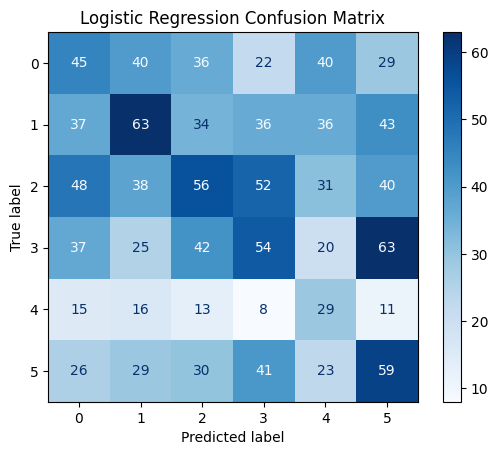

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

lr_model = LogisticRegression(max_iter=1000)

lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

accuracy_lr = accuracy_score(y_test, y_pred_lr)
report_lr = classification_report(y_test, y_pred_lr)

print("Logistic Regression Accuracy: ", accuracy_lr)
print("Logistic Regression Classification Report:\n", report_lr)

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

plot_conf_matrix(y_test, y_pred_lr, "Logistic Regression Confusion Matrix")


Homogeneity Score: 0.0183


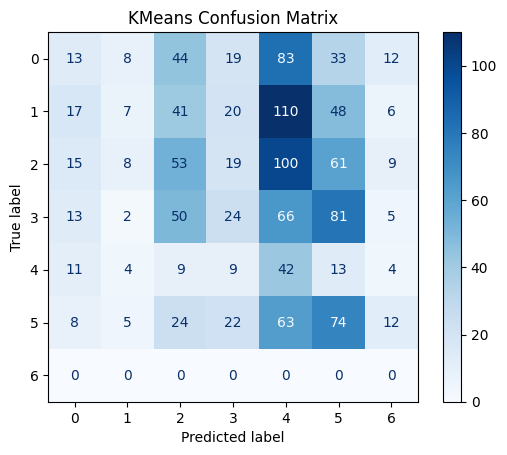

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import homogeneity_score

num_clusters = 7

km = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)

km.fit(X_train)

cluster_labels = km.predict(X_test)

homogeneity = homogeneity_score(y_test, cluster_labels)

print(f"Homogeneity Score: {homogeneity:.4f}")

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(title)
    plt.show()

plot_conf_matrix(y_test, cluster_labels, "KMeans Confusion Matrix")


In [ ]:
results = {
    'Naive Bayes Accuracy': accuracy_nb,
    'Decision Tree Accuracy': accuracy_dt,
    'KNN Accuracy': accuracy_knn,
    'KMeans Homogeneity': homogeneity,
    'Logistic Regression': accuracy_lr
}

for model, score in results.items():
    print(f"{model}: {score:.4f}")


Naive Bayes Accuracy: 0.2368
Decision Tree Accuracy: 0.2210
KNN Accuracy: 0.1563
KMeans Homogeneity: 0.0183
Logistic Regression: 0.2415


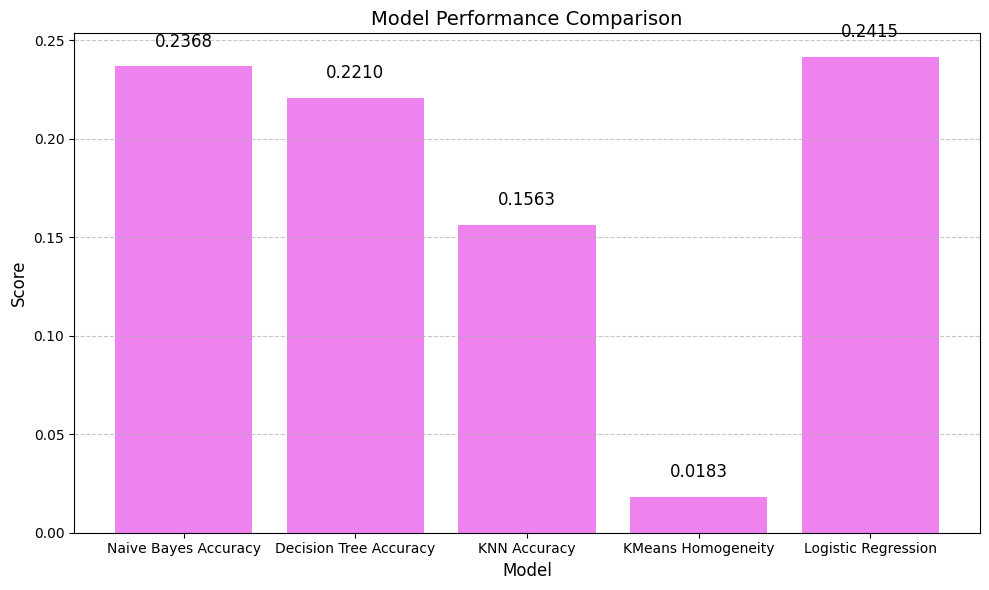

In [ ]:
import matplotlib.pyplot as plt

results = {
    'Naive Bayes Accuracy': accuracy_nb,
    'Decision Tree Accuracy': accuracy_dt,
    'KNN Accuracy': accuracy_knn,
    'KMeans Homogeneity': homogeneity,
    'Logistic Regression': accuracy_lr
}

plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values(), color='violet')

plt.title('Model Performance Comparison', fontsize=14)
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)

for i, score in enumerate(results.values()):
    plt.text(i, score + 0.01, f'{score:.4f}', ha='center', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import joblib

joblib.dump(nb_model, 'nb_model.pkl')

joblib.dump(lr_model, 'lr_model.pkl')

joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']